# Plan
* Universo, tabular agentes
* Metodos

In [1]:
import pandas as pd
from random import randrange
import random
import math
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)

# Carga datos de entrada

In [4]:
rango_lectura=['2020-10-09','2021-05-18']
rango_indice=['2020-09-09','2021-05-18']

In [5]:
base_rss = pd.read_csv (r'TranformacionBases_Java/Rss_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')
base_twitter = pd.read_csv (r'TranformacionBases_Java/Twitter_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [6]:
# rangos datos lecturas
print("rango rss: min: ",min(base_rss['date_adj']), " max: ",max(base_rss['date_adj']))
print("rango twitter: min: ",min(base_twitter['date']), " max: ",max(base_twitter['date']))

rango rss: min:  2020-10-09  max:  2021-05-18
rango twitter: min:  2020-10-05  max:  2021-05-30


In [7]:
datos_twitter=base_twitter[['id_fuente','date','polaridad']].groupby(['id_fuente','date']).mean().reset_index()
datos_twitter

,id_fuente,date,polaridad
0,BluRadioCo,2020-10-09,-0.347026
1,BluRadioCo,2020-10-10,-0.271511
2,BluRadioCo,2020-10-11,-0.635847
3,BluRadioCo,2020-10-25,-0.249044
4,BluRadioCo,2020-10-26,-0.410109
...,...,...,...
4123,rcnradio,2021-05-26,-0.692930
4124,rcnradio,2021-05-27,-0.619450
4125,rcnradio,2021-05-28,-0.528466
4126,rcnradio,2021-05-29,-0.505510


In [8]:
datos_twitter['date'] = pd.to_datetime(datos_twitter['date'])

In [9]:
datos_rss=base_rss[['fuenteRss','date','polaridad']].groupby(['fuenteRss','date']).mean().reset_index()
datos_rss

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,1/11/2020 04:00,-0.986164
1,http://elnacional.com.do/feed/,1/11/2020 12:00,-0.975831
2,http://elnacional.com.do/feed/,1/11/2020 12:09,-0.105395
3,http://elnacional.com.do/feed/,1/11/2020 12:41,0.157199
4,http://elnacional.com.do/feed/,1/11/2020 12:44,-0.378361
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,9/5/2021 05:02,-0.989599
110016,https://www.reforma.com/rss/portada.xml,9/5/2021 11:01,-0.810466
110017,https://www.reforma.com/rss/portada.xml,9/5/2021 15:19,0.423649
110018,https://www.reforma.com/rss/portada.xml,9/5/2021 15:49,-0.641010


In [10]:
datos_rss['date'] = pd.to_datetime(datos_rss['date'])

In [11]:
##igualar rangos

In [12]:
datos_trm=pd.read_csv (r'TranformacionBases_Java/TRM_total_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [13]:
#datos_trm[(datos_trm['date']>=rango_indice[0]) and (datos_trm['date']<=rango_indice[1])]
datos_trm=datos_trm[datos_trm['date']>=rango_indice[0]]
datos_trm=datos_trm[datos_trm['date']<=rango_indice[1]]

In [14]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12
10519,14/9/2020,13/9/2020,3709.00,0.00,1,dom,1,1,2020-09-13
...,...,...,...,...,...,...,...,...,...
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16
10765,18/5/2021,17/5/2021,3682.84,0.00,2,lun,0,1,2021-05-17


In [15]:
datos_trm['date'] = pd.to_datetime(datos_trm['date'])

In [16]:
datos_twitter.columns=['fuente','date','polaridad']
datos_rss.columns=['fuente','date','polaridad']

In [17]:
datos_rss

,fuente,date,polaridad
0,http://elnacional.com.do/feed/,2020-01-11 04:00:00,-0.986164
1,http://elnacional.com.do/feed/,2020-01-11 12:00:00,-0.975831
2,http://elnacional.com.do/feed/,2020-01-11 12:09:00,-0.105395
3,http://elnacional.com.do/feed/,2020-01-11 12:41:00,0.157199
4,http://elnacional.com.do/feed/,2020-01-11 12:44:00,-0.378361
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599
110016,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466
110017,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649
110018,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010


In [18]:
datos_lectura=datos_twitter.append(datos_rss)

<ipython-input-18-9da13647d47a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos_lectura=datos_twitter.append(datos_rss)


In [19]:
datos_lectura

,fuente,date,polaridad
0,BluRadioCo,2020-10-09 00:00:00,-0.347026
1,BluRadioCo,2020-10-10 00:00:00,-0.271511
2,BluRadioCo,2020-10-11 00:00:00,-0.635847
3,BluRadioCo,2020-10-25 00:00:00,-0.249044
4,BluRadioCo,2020-10-26 00:00:00,-0.410109
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599
110016,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466
110017,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649
110018,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010


In [20]:
datos_lectura=datos_lectura[datos_lectura['polaridad']!=0]

## Carga Maestro Fuentes

In [21]:
base_maestro_fuentes = pd.read_csv (r'TranformacionBases_Java/maestro_fuentes.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [22]:
base_maestro_fuentes.reset_index()

,index,fuente,tipo
0,0,http://elnacional.com.do/feed/,rss
1,1,http://ep00.epimg.net/rss/economia/portada.xml,rss
2,2,http://ep00.epimg.net/rss/tags/ultimas_noticia...,rss
3,3,http://feeds.nytimes.com/nyt/rss/Business,rss
4,4,http://feeds.nytimes.com/nyt/rss/Technology,rss
...,...,...,...
132,132,elcolombiano,twitter
133,133,elespectador,twitter
134,134,lafm,twitter
135,135,rcnmundo,twitter


In [23]:
datos_lectura=datos_lectura.merge(base_maestro_fuentes.reset_index(), left_on='fuente', right_on='fuente', how='left')
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09 00:00:00,-0.347026,118,twitter
1,BluRadioCo,2020-10-10 00:00:00,-0.271511,118,twitter
2,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter
3,BluRadioCo,2020-10-25 00:00:00,-0.249044,118,twitter
4,BluRadioCo,2020-10-26 00:00:00,-0.410109,118,twitter
...,...,...,...,...,...
104999,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599,117,rss
105000,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466,117,rss
105001,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649,117,rss
105002,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010,117,rss


# Calendario

In [24]:
calendario = pd.DataFrame({"Date": pd.date_range(rango_indice[0], rango_indice[1])})

In [25]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


# Parametros Globales

In [26]:
#AGENTES
NUM_FUENTES_TOTATALES=137
NUM_FUENTES_INTERPRETACION=5

In [27]:
#UNIVERSO
POBLACION_INICIAL=100
CANT_COMPRADORES=0.7

#LIMITE_QUIEBRA=1000
LIMITE_QUIEBRA=100000
MAX_GENERACION_AGENTES=0.1

POBLACION_ACTUAL=0

In [28]:
FECHA_PULSO=36   #fecha inicial con información suficiente

In [29]:
VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [30]:
VALOR_MOMENTO_INDICE

3854.47

In [31]:
DF_TRANSACCIONES=pd.DataFrame(columns=['idComprador','idVendedor','cantidadTransaccion','precioTransaccion','fechaPulso']) ###llevar antes al algoritmo

# Agente

In [32]:
agente={}

agente['TIPO']='Comprador'
agente['id']=1
agente['capital']= randrange(1000,1000000000)
agente['stockProducto']=randrange(10,1000000)
agente['umbralStock']=randrange(10,1000000)
agente['habilidadAdministrativa']=random.uniform(-0.02, 0.5)
agente['tasaConsumo']=random.uniform(0.1, 0.5)

if agente['TIPO']=='Comprador':
    agente['rentabilidad']=random.uniform(0.1, 0.2)
elif agente['TIPO']=='Vendedor':
    agente['rentabilidad']=random.uniform(0.2, 0.6)

agente['tamanoRegresion']= randrange(5,20)
# perfilIntereses  No aplica
agente['impactoTextos']=random.uniform(-1, 1)

agente['estrategiaLectura']=[0]*NUM_FUENTES_INTERPRETACION
agente['estrategiaLectura_imp']=[0]*NUM_FUENTES_INTERPRETACION

for i in range(NUM_FUENTES_INTERPRETACION):
    agente['estrategiaLectura'][i]=randrange(NUM_FUENTES_TOTATALES)
    agente['estrategiaLectura_imp'][i]=random.random()
    
agente['numeroDiasLecturas']=randrange(2,7)
agente['umbralPronostico']=random.uniform(0.2, 0.5)

agente['porcentajeCapitalCompra']=random.uniform(0, 1)
agente['porcentajeStockVenta']=random.uniform(0, 1)

#agente['costoMauc']  costo del commoditie según bolsa

agente['costosFijos']=random.uniform(0.1, 0.3)
agente['tasaProduccion']=random.uniform(0, 0.5)
agente['limiteSobrePrecio']=random.uniform(0.01, 0.3)

agente['viveza']=random.uniform(0.01, 0.2)
agente['controlGastosEImpuestos']=random.uniform(0.01, 0.1)

In [33]:
agente

{'TIPO': 'Comprador',
 'id': 1,
 'capital': 772573391,
 'stockProducto': 957777,
 'umbralStock': 736644,
 'habilidadAdministrativa': 0.04089508186741324,
 'tasaConsumo': 0.2849398665098617,
 'rentabilidad': 0.1057536137468795,
 'tamanoRegresion': 10,
 'impactoTextos': 0.27614873634290227,
 'estrategiaLectura': [24, 58, 106, 67, 59],
 'estrategiaLectura_imp': [0.9539224471301241,
  0.43275836201919626,
  0.6470031251313237,
  0.34552340045793306,
  0.6840786940388777],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.4829064440248683,
 'porcentajeCapitalCompra': 0.4581640925292576,
 'porcentajeStockVenta': 0.730410998443239,
 'costosFijos': 0.12743634897555,
 'tasaProduccion': 0.09170221929793693,
 'limiteSobrePrecio': 0.21648293120377765,
 'viveza': 0.18996858406508682,
 'controlGastosEImpuestos': 0.057493657782182794}

In [34]:
def crearAgente(id,tipo): #quizas falta el valor del var econ,
    agente={}
    agente['TIPO']=tipo
    agente['id']=id
    agente['capital']= randrange(1000,1000000000)
    agente['stockProducto']=randrange(10,1000000)
    agente['umbralStock']=randrange(10,1000000)
    agente['habilidadAdministrativa']=random.uniform(-0.02, 0.5)
    agente['tasaConsumo']=random.uniform(0.1, 0.5)
    if agente['TIPO']=='Comprador':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    elif agente['TIPO']=='Vendedor':
        agente['rentabilidad']=random.uniform(0.2, 0.6)
    agente['tamanoRegresion']= randrange(5,20)
    # perfilIntereses  No aplica
    agente['impactoTextos']=random.uniform(-1, 1)
    agente['estrategiaLectura']=[0]*NUM_FUENTES_INTERPRETACION
    agente['estrategiaLectura_imp']=[0]*NUM_FUENTES_INTERPRETACION
    for i in range(NUM_FUENTES_INTERPRETACION):
        agente['estrategiaLectura'][i]=randrange(NUM_FUENTES_TOTATALES)
        agente['estrategiaLectura_imp'][i]=random.random()
    agente['numeroDiasLecturas']=randrange(2,7)
    agente['umbralPronostico']=random.uniform(0.2, 0.5)
    agente['porcentajeCapitalCompra']=random.uniform(0, 1)
    agente['porcentajeStockVenta']=random.uniform(0, 1)
    #agente['costoMauc']  costo del commoditie según bolsa
    agente['costosFijos']=random.uniform(0.1, 0.3)
    agente['tasaProduccion']=random.uniform(0, 0.5)
    agente['limiteSobrePrecio']=random.uniform(0.01, 0.3)
    agente['viveza']=random.uniform(0.01, 0.2)
    agente['controlGastosEImpuestos']=random.uniform(0.01, 0.1)
    return agente

# Universo

In [35]:
compradores=[]
vendedores=[]

In [36]:
type(compradores)

list

In [37]:
#GENERACION ESPONTANEA UNIVERSO
for i in range(POBLACION_INICIAL):
    if(random.random()<=CANT_COMPRADORES):
        compradores.append(crearAgente(i,'Comprador'))
    else:
        vendedores.append(crearAgente(i,'Vendedor'))

In [38]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  69 numVendedores:  31


## Pulso

In [39]:
# Serie de valores indice
valorIndiceMomento=100

In [40]:
# De 0 a 10,  porque?

In [41]:
# contar pulso

In [42]:
# evolucionar
 #quiebraEmpresas
 #nuevosAgentes
def quiebraEmpresas():
    #quiebraEmpresas    
    for comp in compradores:
        capiltalEmpresa=comp['capital']
        valorStockEmpresa=comp['stockProducto']*valorIndiceMomento
        valorEmpresa=capiltalEmpresa+valorStockEmpresa
        #print("val comp: ", "ce: ",capiltalEmpresa, "ve: ",valorEmpresa, "lq: ",LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            compradores.remove(comp)           
            
            
    for vend in vendedores:
        capiltalEmpresa=vend['capital']
        valorStockEmpresa=vend['stockProducto']*valorIndiceMomento
        valorEmpresa=capiltalEmpresa+valorStockEmpresa
        #print("val vend: ", "ce: ",capiltalEmpresa, "ve: ",valorEmpresa, "lq: ",LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraVend")
            vendedores.remove(vend)    

In [43]:
quiebraEmpresas()

In [44]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  69 numVendedores:  31


In [45]:
POBLACION_ACTUAL=len(compradores)+len(vendedores)

In [46]:
POBLACION_ACTUAL

100

In [47]:
def nuevosAgentes():
    num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    print("nuevos Agentes: ", num_nuevos_agentes, "pob actual: ",POBLACION_ACTUAL, "pob final: ",POBLACION_ACTUAL+num_nuevos_agentes)
    for i in range(POBLACION_ACTUAL,POBLACION_ACTUAL+num_nuevos_agentes):
        if(random.random()<=CANT_COMPRADORES):
            compradores.append(crearAgente(i,'Comprador'))
        else:
            vendedores.append(crearAgente(i,'Vendedor'))

In [48]:
nuevosAgentes()

nuevos Agentes:  6 pob actual:  100 pob final:  106


In [49]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  73 numVendedores:  33


### Pronostico Individual
* Regresion lineal u otro
 * tener en cuenta tamañoRegresión
 * validar si horizonte igual a 1
* prorateo entre valor polaridad fuentes seleccinadas e impactos
* suma del pronostico con el prorrateo

In [50]:
## simulacion resultados polarizacion

In [51]:
##Prediccion
#

## Validación metodo Forecast

In [52]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12
10519,14/9/2020,13/9/2020,3709.00,0.00,1,dom,1,1,2020-09-13
...,...,...,...,...,...,...,...,...,...
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16
10765,18/5/2021,17/5/2021,3682.84,0.00,2,lun,0,1,2021-05-17


<AxesSubplot:>

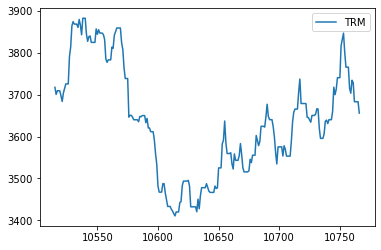

In [53]:
datos_trm[['TRM']].plot()

In [54]:
modelo_agente=SimpleExpSmoothing(datos_trm['TRM']).fit(smoothing_level=0.5,optimized=False)
modelo_agente.forecast()

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


252    3670.712316
dtype: float64

### pronostico de lectura

In [55]:
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09 00:00:00,-0.347026,118,twitter
1,BluRadioCo,2020-10-10 00:00:00,-0.271511,118,twitter
2,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter
3,BluRadioCo,2020-10-25 00:00:00,-0.249044,118,twitter
4,BluRadioCo,2020-10-26 00:00:00,-0.410109,118,twitter
...,...,...,...,...,...
104999,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599,117,rss
105000,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466,117,rss
105001,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649,117,rss
105002,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010,117,rss


In [56]:
serie_lectura_prueba=datos_lectura[datos_lectura['index'].isin([117, 119, 103, 107, 131])]

In [57]:
serie_lectura_prueba

,fuente,date,polaridad,index,tipo
218,CaracolRadio,2020-10-09 00:00:00,-0.413447,119,twitter
219,CaracolRadio,2020-10-10 00:00:00,-0.271894,119,twitter
220,CaracolRadio,2020-10-11 00:00:00,-0.219595,119,twitter
221,CaracolRadio,2020-10-25 00:00:00,-0.363552,119,twitter
222,CaracolRadio,2020-10-26 00:00:00,-0.378845,119,twitter
...,...,...,...,...,...
104999,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599,117,rss
105000,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466,117,rss
105001,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649,117,rss
105002,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010,117,rss


In [58]:
calendario.iloc[FECHA_PULSO]['Date']

Timestamp('2020-10-15 00:00:00')

In [59]:
serie_lectura_prueba=serie_lectura_prueba[serie_lectura_prueba['date']<=calendario.iloc[FECHA_PULSO]['Date']]

In [60]:
serie_lectura_prueba=serie_lectura_prueba[serie_lectura_prueba['date']>=calendario.iloc[FECHA_PULSO-3]['Date']]

In [61]:
serie_lectura_prueba

,fuente,date,polaridad,index,tipo
91622,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 00:16:00,0.421500,103,rss
91623,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 00:23:00,-0.440400,103,rss
91624,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 16:23:00,-0.296000,103,rss
91625,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 19:16:00,0.709600,103,rss
91626,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 20:38:00,-0.476700,103,rss
91627,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 20:59:00,-0.933700,103,rss
91628,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 21:26:00,-0.709600,103,rss
91629,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 21:49:00,-0.835000,103,rss
91630,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 22:36:00,-0.510600,103,rss
91631,https://www.nydailynews.com/cmlink/NYDN.News.P...,2020-10-12 23:04:00,0.226300,103,rss


## Metodo Agente
* IMPORTANTE: Primero lo con fecha de operacion trm, pero mover con fecha oficial del dia anterior

In [62]:
#agente de prueba
agente_prueba=vendedores[0]
agente_prueba

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594}

In [63]:
calendario.iloc[FECHA_PULSO]['Date']

Timestamp('2020-10-15 00:00:00')

In [64]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


In [65]:
reg_inicio=FECHA_PULSO-agente_prueba['tamanoRegresion']
rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

In [66]:
serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

In [67]:
serie_indice_agente

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
10538,3/10/2020,2/10/2020,3881.80,39.46,6,vie,0,0,2020-10-02
10539,4/10/2020,3/10/2020,3881.80,0.00,7,sáb,1,1,2020-10-03
10540,5/10/2020,4/10/2020,3881.80,0.00,1,dom,1,1,2020-10-04
10541,6/10/2020,5/10/2020,3843.75,-38.05,2,lun,0,0,2020-10-05
10542,7/10/2020,6/10/2020,3826.77,-16.98,3,mar,0,0,2020-10-06
10543,8/10/2020,7/10/2020,3837.79,11.02,4,mié,0,0,2020-10-07
10544,9/10/2020,8/10/2020,3839.73,1.94,5,jue,0,0,2020-10-08
10545,10/10/2020,9/10/2020,3824.25,-15.48,6,vie,0,0,2020-10-09
10546,11/10/2020,10/10/2020,3824.25,0.00,7,sáb,1,1,2020-10-10
10547,12/10/2020,11/10/2020,3824.25,0.00,1,dom,1,1,2020-10-11


In [68]:
modelo_agente=SimpleExpSmoothing(serie_indice_agente['TRM']).fit(smoothing_level=0.5,optimized=False)
prediccion_base_agente=modelo_agente.forecast()
prediccion_base_agente

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


14    3848.330747
dtype: float64

In [69]:
prediccion_base_agente.values[0]

3848.330747070312

### aporte lectura

In [70]:
df_lecura_agente=pd.DataFrame({'index':agente_prueba['estrategiaLectura'] , 'impacto': agente_prueba['estrategiaLectura_imp']})
df_lecura_agente

,index,impacto
0,72,0.978158
1,17,0.750096
2,118,0.818821
3,48,0.978675
4,19,0.137601


In [71]:
lect_inicio=FECHA_PULSO-agente_prueba['numeroDiasLecturas']

In [72]:
rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

In [73]:
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09 00:00:00,-0.347026,118,twitter
1,BluRadioCo,2020-10-10 00:00:00,-0.271511,118,twitter
2,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter
3,BluRadioCo,2020-10-25 00:00:00,-0.249044,118,twitter
4,BluRadioCo,2020-10-26 00:00:00,-0.410109,118,twitter
...,...,...,...,...,...
104999,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599,117,rss
105000,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466,117,rss
105001,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649,117,rss
105002,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010,117,rss


In [74]:
serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]

In [75]:
serie_lectura_agente

,fuente,date,polaridad,index,tipo
2,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter
220,CaracolRadio,2020-10-11 00:00:00,-0.219595,119,twitter
435,ELTIEMPO,2020-10-11 00:00:00,-0.382073,120,twitter
651,MailOnline,2020-10-11 00:00:00,0.025260,121,twitter
1088,NBCNews,2020-10-11 00:00:00,-0.077965,123,twitter
...,...,...,...,...,...
103885,https://www.reforma.com/rss/portada.xml,2020-10-12 20:06:00,-0.890052,117,rss
103886,https://www.reforma.com/rss/portada.xml,2020-10-12 22:43:00,-0.994297,117,rss
103887,https://www.reforma.com/rss/portada.xml,2020-10-12 22:49:00,-0.898336,117,rss
103888,https://www.reforma.com/rss/portada.xml,2020-10-12 22:50:00,-0.667400,117,rss


In [76]:
serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')
serie_lectura_agente

,fuente,date,polaridad,index,tipo,impacto
0,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter,0.818821
1,CaracolRadio,2020-10-11 00:00:00,-0.219595,119,twitter,NaN
2,ELTIEMPO,2020-10-11 00:00:00,-0.382073,120,twitter,NaN
3,MailOnline,2020-10-11 00:00:00,0.025260,121,twitter,NaN
4,NBCNews,2020-10-11 00:00:00,-0.077965,123,twitter,NaN
...,...,...,...,...,...,...
1531,https://www.reforma.com/rss/portada.xml,2020-10-12 20:06:00,-0.890052,117,rss,NaN
1532,https://www.reforma.com/rss/portada.xml,2020-10-12 22:43:00,-0.994297,117,rss,NaN
1533,https://www.reforma.com/rss/portada.xml,2020-10-12 22:49:00,-0.898336,117,rss,NaN
1534,https://www.reforma.com/rss/portada.xml,2020-10-12 22:50:00,-0.667400,117,rss,NaN


In [77]:
serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
serie_lectura_agente

,fuente,date,polaridad,index,tipo,impacto
0,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter,0.818821
273,http://feeds.washingtonpost.com/rss/world,2020-10-11 07:15:00,-0.458800,17,rss,0.750096
274,http://feeds.washingtonpost.com/rss/world,2020-10-11 07:49:00,-0.476700,17,rss,0.750096
275,http://feeds.washingtonpost.com/rss/world,2020-10-11 07:51:00,-0.153100,17,rss,0.750096
276,http://feeds.washingtonpost.com/rss/world,2020-10-11 08:06:00,-0.851900,17,rss,0.750096
...,...,...,...,...,...,...
1104,https://feeds.a.dj.com/rss/RSSMarketsMain.xml,2020-10-12 17:54:00,0.628500,72,rss,0.978158
1105,https://feeds.a.dj.com/rss/RSSMarketsMain.xml,2020-10-12 18:35:00,0.250000,72,rss,0.978158
1106,https://feeds.a.dj.com/rss/RSSMarketsMain.xml,2020-10-12 19:50:00,-0.670500,72,rss,0.978158
1107,https://feeds.a.dj.com/rss/RSSMarketsMain.xml,2020-10-12 20:46:00,-0.273200,72,rss,0.978158


In [78]:
serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']

<ipython-input-78-fefaff5456e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']


In [79]:
#aporte lectura
serie_lectura_agente['factor'].mean()*agente_prueba['impactoTextos']

0.0490392644699252

In [80]:
agente_prueba['pronosticos_dia_siguiente']=prediccion_base_agente.values[0]*(1+serie_lectura_agente['factor'].mean()*agente_prueba['impactoTextos'])

In [81]:
agente_prueba

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376}

In [82]:
vendedores[0]

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376}

## Pronosticos individuales todos los agentes

In [83]:
def pronosticoAgente(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['TRM']).fit(smoothing_level=0.5,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()

    prediccion_base_agente=prediccion_base_agente.values[0]

    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']

    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]

    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [84]:
pronosticoAgente(vendedores[0])

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4037.0500563436376

In [85]:
vendedores[0]

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376}

In [86]:
pronosticoAgente(vendedores[1])

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3781.720257766146

In [87]:
vendedores[1]

{'TIPO': 'Vendedor',
 'id': 1,
 'capital': 641728343,
 'stockProducto': 738847,
 'umbralStock': 154283,
 'habilidadAdministrativa': 0.36033561466312003,
 'tasaConsumo': 0.16395474284361516,
 'rentabilidad': 0.592423165712729,
 'tamanoRegresion': 6,
 'impactoTextos': 0.3209224801884196,
 'estrategiaLectura': [93, 28, 51, 77, 116],
 'estrategiaLectura_imp': [0.6353801716668059,
  0.011942276375113914,
  0.5052848301891706,
  0.022660332176361875,
  0.46814296512620535],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.2310974072283294,
 'porcentajeCapitalCompra': 0.7179171151400161,
 'porcentajeStockVenta': 0.8051627882943756,
 'costosFijos': 0.29247547979610117,
 'tasaProduccion': 0.4153288023696958,
 'limiteSobrePrecio': 0.18357814265808153,
 'viveza': 0.03802725125123496,
 'controlGastosEImpuestos': 0.052858160942954376}

In [88]:
vendedores[2]

{'TIPO': 'Vendedor',
 'id': 4,
 'capital': 984386587,
 'stockProducto': 856952,
 'umbralStock': 177073,
 'habilidadAdministrativa': 0.28982934295273644,
 'tasaConsumo': 0.30407842972295696,
 'rentabilidad': 0.35247692732354524,
 'tamanoRegresion': 15,
 'impactoTextos': 0.09185494521277593,
 'estrategiaLectura': [68, 91, 70, 65, 79],
 'estrategiaLectura_imp': [0.2306312949596676,
  0.5341116418986094,
  0.9717073072862561,
  0.21138809758774002,
  0.48294473659986836],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.26048050644040144,
 'porcentajeCapitalCompra': 0.41088226398691474,
 'porcentajeStockVenta': 0.7291850328168025,
 'costosFijos': 0.2042860679659746,
 'tasaProduccion': 0.17340540980108832,
 'limiteSobrePrecio': 0.14064264264763307,
 'viveza': 0.10576464476025814,
 'controlGastosEImpuestos': 0.048928665966632666}

In [89]:
pronosticoAgente(vendedores[2])

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3680.5415400585816

In [90]:
vendedores[2]

{'TIPO': 'Vendedor',
 'id': 4,
 'capital': 984386587,
 'stockProducto': 856952,
 'umbralStock': 177073,
 'habilidadAdministrativa': 0.28982934295273644,
 'tasaConsumo': 0.30407842972295696,
 'rentabilidad': 0.35247692732354524,
 'tamanoRegresion': 15,
 'impactoTextos': 0.09185494521277593,
 'estrategiaLectura': [68, 91, 70, 65, 79],
 'estrategiaLectura_imp': [0.2306312949596676,
  0.5341116418986094,
  0.9717073072862561,
  0.21138809758774002,
  0.48294473659986836],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.26048050644040144,
 'porcentajeCapitalCompra': 0.41088226398691474,
 'porcentajeStockVenta': 0.7291850328168025,
 'costosFijos': 0.2042860679659746,
 'tasaProduccion': 0.17340540980108832,
 'limiteSobrePrecio': 0.14064264264763307,
 'viveza': 0.10576464476025814,
 'controlGastosEImpuestos': 0.048928665966632666}

In [91]:
def pronosticoUniverso():
    for comp in compradores:
        print(pronosticoAgente(comp))
        comp['pronosticos_dia_siguiente']=pronosticoAgente(comp)
    for vend in vendedores:
        print(pronosticoAgente(vend))
        vend['pronosticos_dia_siguiente']=pronosticoAgente(vend)

In [92]:
pronosticoUniverso()

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3792.6670035611132
3794.468156894739
3806.7506578548314
3301.192773306605
3365.6728082845957
3849.1800923663914
4310.781610791308


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3899.1753673669177
3656.5174853006497
3761.507018218747
3815.778509375974
3848.2037499999997
3710.560580445345
3007.0383884775315


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3616.5625556559885
4266.6898072520125
3871.2298621630407
3597.8714248867263
3848.329134941101
3958.7087632705116
3535.51969124744


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4128.380798394629
3450.576473647747
3900.0258378481076
3743.364760425432
3456.802334597557
4505.573087962655
3444.027242071776


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3796.478304733526
4038.5473052501216
3191.3569276872013
3693.995089016344
3476.7529635462843
3753.1991839405187
3939.3339577336496


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4038.6334866500483
3603.45563506466
3845.819647562022
3546.291838012451
3968.486598271931
3928.2614858793295
3851.1151663324636


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3613.609561988042
2830.792483709018
2981.9254581618816
3663.645519810415
3639.2016214641035
3848.2037499999997


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3853.667543935341
3960.671731392108
3848.2955859374997
3862.5498345447813
3848.3291047668454
3328.569395254154
3182.9418281021667


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4841.403217488384
4716.385418362643
4749.180949434557
4488.334556834142
3824.531949201975
3849.7157531158814
3868.502965768881


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3577.2825622475316
3800.5250061218203
4002.9798548865956
3600.8746577097786
5640.93252927081
3848.328338623047
3813.921837818432


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3846.2093085093984
3640.8821270344097
4160.960292163466
4519.17215927806
4037.0500563436376
3781.720257766146
3680.5415400585816
3305.346420822833


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3823.3035533876678
3926.136721484808
4027.2375898595074
3848.3290444946288
4143.011179086197
3277.9519113393226
4118.8047887185785
3634.935320667496


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3556.3840975178086
3988.694694459719
4572.3334571971145
5185.988025800345
3878.21238839738
5091.665324946826
3836.414976225388
3832.0770698108095


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3848.3246875
3848.330747070312
3837.019492978756
3977.0728156360337
4011.767952196639
4876.246548027839
3794.623622427826


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3848.330747070312
3775.971253599128
3848.2037499999997
3915.47624986098
4168.866982757177
4145.288640058402


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

In [93]:
vendedores

[{'TIPO': 'Vendedor',
  'id': 0,
  'capital': 216833744,
  'stockProducto': 297518,
  'umbralStock': 414032,
  'habilidadAdministrativa': -0.0035800825237114267,
  'tasaConsumo': 0.48901640915727895,
  'rentabilidad': 0.24228654487476944,
  'tamanoRegresion': 13,
  'impactoTextos': 0.9591741548007275,
  'estrategiaLectura': [72, 17, 118, 48, 19],
  'estrategiaLectura_imp': [0.9781580630851443,
   0.7500956390262138,
   0.8188212061605327,
   0.9786752280997263,
   0.13760133111144457],
  'numeroDiasLecturas': 4,
  'umbralPronostico': 0.3872441328158085,
  'porcentajeCapitalCompra': 0.3660991394659796,
  'porcentajeStockVenta': 0.6636099307722945,
  'costosFijos': 0.2635119213278402,
  'tasaProduccion': 0.41953863091476057,
  'limiteSobrePrecio': 0.2266093264312623,
  'viveza': 0.19958453579455002,
  'controlGastosEImpuestos': 0.06220394818945594,
  'pronosticos_dia_siguiente': 4037.0500563436376},
 {'TIPO': 'Vendedor',
  'id': 1,
  'capital': 641728343,
  'stockProducto': 738847,
  'um

In [94]:
pd.DataFrame.from_dict(vendedores).isnull().sum()

TIPO                         0
id                           0
capital                      0
stockProducto                0
umbralStock                  0
habilidadAdministrativa      0
tasaConsumo                  0
rentabilidad                 0
tamanoRegresion              0
impactoTextos                0
estrategiaLectura            0
estrategiaLectura_imp        0
numeroDiasLecturas           0
umbralPronostico             0
porcentajeCapitalCompra      0
porcentajeStockVenta         0
costosFijos                  0
tasaProduccion               0
limiteSobrePrecio            0
viveza                       0
controlGastosEImpuestos      0
pronosticos_dia_siguiente    0
dtype: int64

In [95]:
len(vendedores)

33

In [96]:
pd.DataFrame.from_dict(compradores).isnull().sum()

TIPO                         0
id                           0
capital                      0
stockProducto                0
umbralStock                  0
habilidadAdministrativa      0
tasaConsumo                  0
rentabilidad                 0
tamanoRegresion              0
impactoTextos                0
estrategiaLectura            0
estrategiaLectura_imp        0
numeroDiasLecturas           0
umbralPronostico             0
porcentajeCapitalCompra      0
porcentajeStockVenta         0
costosFijos                  0
tasaProduccion               0
limiteSobrePrecio            0
viveza                       0
controlGastosEImpuestos      0
pronosticos_dia_siguiente    0
dtype: int64

In [97]:
len(compradores)

73

## Activar agentes para la negociación
* contar cuantos se están activando
* definicion cuando, cuanto y precio negociación,  varia según rol (comprador o vendedor)

#### Comprador

In [98]:
agente_prueba=compradores[0]
agente_prueba

{'TIPO': 'Comprador',
 'id': 2,
 'capital': 52840395,
 'stockProducto': 947077,
 'umbralStock': 866815,
 'habilidadAdministrativa': 0.13483388912409458,
 'tasaConsumo': 0.11699296686417592,
 'rentabilidad': 0.16055061709916085,
 'tamanoRegresion': 14,
 'impactoTextos': 0.45572683953339976,
 'estrategiaLectura': [130, 54, 105, 110, 4],
 'estrategiaLectura_imp': [0.8523413619966064,
  0.3704334201386875,
  0.04509427194337012,
  0.20870478937192727,
  0.831837415394771],
 'numeroDiasLecturas': 3,
 'umbralPronostico': 0.3081974208073306,
 'porcentajeCapitalCompra': 0.9788754768967145,
 'porcentajeStockVenta': 0.6868898647193806,
 'costosFijos': 0.20245560247246364,
 'tasaProduccion': 0.02827992481884367,
 'limiteSobrePrecio': 0.15788054557173273,
 'viveza': 0.18403237133419273,
 'controlGastosEImpuestos': 0.06075548424877581,
 'pronosticos_dia_siguiente': 3792.6670035611132}

In [99]:
agente_prueba['activo']=False
#necesita stock?
val_stock=agente_prueba['stockProducto']<agente_prueba['umbralStock']
#el cambio del mercado le combiene?  prediccion - valor actual
val_conveniencia=(agente_prueba['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente_prueba['umbralPronostico']
#alguna de las 2 situaciones
agente_prueba['activo']=val_stock or val_conveniencia

In [100]:
agente_prueba

{'TIPO': 'Comprador',
 'id': 2,
 'capital': 52840395,
 'stockProducto': 947077,
 'umbralStock': 866815,
 'habilidadAdministrativa': 0.13483388912409458,
 'tasaConsumo': 0.11699296686417592,
 'rentabilidad': 0.16055061709916085,
 'tamanoRegresion': 14,
 'impactoTextos': 0.45572683953339976,
 'estrategiaLectura': [130, 54, 105, 110, 4],
 'estrategiaLectura_imp': [0.8523413619966064,
  0.3704334201386875,
  0.04509427194337012,
  0.20870478937192727,
  0.831837415394771],
 'numeroDiasLecturas': 3,
 'umbralPronostico': 0.3081974208073306,
 'porcentajeCapitalCompra': 0.9788754768967145,
 'porcentajeStockVenta': 0.6868898647193806,
 'costosFijos': 0.20245560247246364,
 'tasaProduccion': 0.02827992481884367,
 'limiteSobrePrecio': 0.15788054557173273,
 'viveza': 0.18403237133419273,
 'controlGastosEImpuestos': 0.06075548424877581,
 'pronosticos_dia_siguiente': 3792.6670035611132,
 'activo': False}

In [101]:
#vendedores[0]

In [102]:
#cuanto comprar
agente_prueba['cantidadTransaccionar']=agente_prueba['capital']*agente_prueba['porcentajeCapitalCompra']

In [103]:
#precio negociacion
#cambio de eclipse, escala entre los datos y definir precio según viveza
#agente_prueba['precioNegociacion']=(VALOR_MOMENTO_INDICE+agente_prueba['pronosticos_dia_siguiente'])*(1/2)*(1-agente_prueba['viveza'])
agente_prueba['precioNegociacion']=(agente_prueba['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente_prueba['viveza'])+VALOR_MOMENTO_INDICE

In [104]:
agente_prueba

{'TIPO': 'Comprador',
 'id': 2,
 'capital': 52840395,
 'stockProducto': 947077,
 'umbralStock': 866815,
 'habilidadAdministrativa': 0.13483388912409458,
 'tasaConsumo': 0.11699296686417592,
 'rentabilidad': 0.16055061709916085,
 'tamanoRegresion': 14,
 'impactoTextos': 0.45572683953339976,
 'estrategiaLectura': [130, 54, 105, 110, 4],
 'estrategiaLectura_imp': [0.8523413619966064,
  0.3704334201386875,
  0.04509427194337012,
  0.20870478937192727,
  0.831837415394771],
 'numeroDiasLecturas': 3,
 'umbralPronostico': 0.3081974208073306,
 'porcentajeCapitalCompra': 0.9788754768967145,
 'porcentajeStockVenta': 0.6868898647193806,
 'costosFijos': 0.20245560247246364,
 'tasaProduccion': 0.02827992481884367,
 'limiteSobrePrecio': 0.15788054557173273,
 'viveza': 0.18403237133419273,
 'controlGastosEImpuestos': 0.06075548424877581,
 'pronosticos_dia_siguiente': 3792.6670035611132,
 'activo': False,
 'cantidadTransaccionar': 51724166.85503577,
 'precioNegociacion': 3804.04075555132}

In [105]:
def activacionComprador(agente):
    #cuando
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']<agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto comprar
    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']
    #precio negociacion
    agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    return agente['activo']

### Vendedor

In [106]:
agente_prueba=vendedores[0]
agente_prueba

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376}

In [107]:
#cuando vender
agente_prueba['activo']=False
#necesita stock?
val_stock=agente_prueba['stockProducto']>agente_prueba['umbralStock']
#el cambio del mercado le combiene?  prediccion - valor actual
val_conveniencia=(VALOR_MOMENTO_INDICE - agente_prueba['pronosticos_dia_siguiente'] ) > agente_prueba['umbralPronostico']
#alguna de las 2 situaciones
agente_prueba['activo']=val_stock or val_conveniencia

In [108]:
#cuanto vender
agente_prueba['cantidadTransaccionar']=agente_prueba['stockProducto']*agente_prueba['porcentajeStockVenta']

In [109]:
#precio negociacion
agente_prueba['precioNegociacion']=(agente_prueba['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente_prueba['viveza'])+VALOR_MOMENTO_INDICE

In [110]:
agente_prueba

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376,
 'activo': False,
 'cantidadTransaccionar': 197435.8993835115,
 'precioNegociacion': 4000.60990055295}

In [111]:
def activacionVendedor(agente):
    #cuando vender
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']>agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto vender
    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
    #precio negociacion
    agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    return agente['activo']

### Activación universo

In [112]:
compradoresActivos=[]
vendedoresActivos=[]

In [113]:
def activacionUniverso():
    for comp in compradores:
        #print(pronosticoAgente(comp))
        auxActivacion=activacionComprador(comp)
        if auxActivacion:
            compradoresActivos.append(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        auxActivacion=activacionVendedor(vend)
        if auxActivacion:
            vendedoresActivos.append(vend)

In [114]:
activacionUniverso()

In [115]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

numCompradoresActivos:  43 numVendedoresActivos:  26


In [116]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  73 numVendedores:  33


## Cotizar y transaccionar

### Ordenar Ofertas

In [117]:
df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')

In [118]:
df_ofertas

,TIPO,id,capital,stockProducto,umbralStock,habilidadAdministrativa,tasaConsumo,rentabilidad,tamanoRegresion,impactoTextos,estrategiaLectura,estrategiaLectura_imp,numeroDiasLecturas,umbralPronostico,porcentajeCapitalCompra,porcentajeStockVenta,costosFijos,tasaProduccion,limiteSobrePrecio,viveza,controlGastosEImpuestos,pronosticos_dia_siguiente,activo,cantidadTransaccionar,precioNegociacion
6,Vendedor,28,305171851,952101,994272,0.313995,0.389169,0.311865,8,0.960471,"[132, 118, 79, 118, 77]","[0.36759903967863283, 0.43795739652191734, 0.3...",6,0.361255,0.805047,0.360077,0.195098,0.013721,0.202856,0.078058,0.038964,3277.951911,True,342829.352900,3322.953591
2,Vendedor,5,842010866,707939,883296,0.018555,0.235746,0.437146,17,0.857026,"[35, 49, 76, 84, 33]","[0.1945285525815168, 0.9470056964606314, 0.057...",6,0.228463,0.151909,0.294808,0.211678,0.035757,0.273490,0.106888,0.097743,3305.346421,True,208706.194833,3364.041069
9,Vendedor,40,872496939,217402,613037,0.354662,0.362697,0.220136,14,0.547342,"[27, 91, 95, 102, 126]","[0.7276810952778532, 0.4784102770371321, 0.548...",5,0.307350,0.431629,0.205833,0.251084,0.322235,0.032474,0.161297,0.054965,3556.384098,True,44748.602146,3604.464572
8,Vendedor,36,345769419,350441,31166,0.312710,0.222393,0.310487,18,0.237328,"[34, 15, 12, 62, 102]","[0.42746112718028073, 0.8932341793501819, 0.82...",6,0.418836,0.849717,0.140272,0.272018,0.157564,0.105952,0.105192,0.026231,3634.935321,True,49156.942108,3658.028542
1,Vendedor,4,984386587,856952,177073,0.289829,0.304078,0.352477,15,0.091855,"[68, 91, 70, 65, 79]","[0.2306312949596676, 0.5341116418986094, 0.971...",6,0.260481,0.410882,0.729185,0.204286,0.173405,0.140643,0.105765,0.048929,3680.541540,True,624876.572242,3698.937022
22,Vendedor,92,541038075,547984,956733,0.044597,0.351576,0.547160,5,0.934798,"[66, 17, 129, 57, 98]","[0.14605420685249004, 0.2167520582321869, 0.58...",4,0.242316,0.256532,0.779480,0.208908,0.144905,0.045111,0.059539,0.074072,3775.971254,True,427142.682196,3780.645026
0,Vendedor,1,641728343,738847,154283,0.360336,0.163955,0.592423,6,0.320922,"[93, 28, 51, 77, 116]","[0.6353801716668059, 0.011942276375113914, 0.5...",5,0.231097,0.717917,0.805163,0.292475,0.415329,0.183578,0.038027,0.052858,3781.720258,True,594892.110643,3784.486730
20,Vendedor,83,934294110,401416,432470,0.456642,0.444762,0.507083,8,0.581304,"[9, 87, 106, 15, 104]","[0.5014524474565415, 0.41001329853814683, 0.17...",5,0.498066,0.698418,0.853333,0.191125,0.247783,0.256077,0.199347,0.071069,3794.623622,True,342541.642222,3806.553826
3,Vendedor,18,828369098,179520,441494,0.090536,0.437201,0.322510,14,-0.374537,"[63, 36, 104, 17, 48]","[0.6748695525878555, 0.39909515025874365, 0.33...",3,0.324255,0.491602,0.948195,0.229145,0.454455,0.036953,0.032555,0.059168,3823.303553,True,170219.926298,3824.318176
14,Vendedor,62,964739892,909828,16872,0.169967,0.477042,0.424106,11,0.037915,"[70, 34, 65, 49, 73]","[0.37305586654329637, 0.49848922639844706, 0.4...",3,0.488141,0.430733,0.977850,0.228587,0.037255,0.200350,0.018840,0.049631,3832.077070,True,889674.909614,3832.498950


In [119]:
mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
mejorVendedor

{'TIPO': 'Vendedor',
 'id': 28,
 'capital': 305171851,
 'stockProducto': 952101,
 'umbralStock': 994272,
 'habilidadAdministrativa': 0.3139951182647006,
 'tasaConsumo': 0.38916856875491335,
 'rentabilidad': 0.31186532245940024,
 'tamanoRegresion': 8,
 'impactoTextos': 0.9604706099207543,
 'estrategiaLectura': [132, 118, 79, 118, 77],
 'estrategiaLectura_imp': [0.36759903967863283,
  0.43795739652191734,
  0.3166819383459907,
  0.32402946675286914,
  0.962098809354257],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.3612546861572432,
 'porcentajeCapitalCompra': 0.8050469810056207,
 'porcentajeStockVenta': 0.36007666508062164,
 'costosFijos': 0.19509837128576588,
 'tasaProduccion': 0.013721181428742735,
 'limiteSobrePrecio': 0.20285608234166935,
 'viveza': 0.07805770623047206,
 'controlGastosEImpuestos': 0.03896436189810123,
 'pronosticos_dia_siguiente': 3277.9519113393226,
 'activo': True,
 'cantidadTransaccionar': 342829.35289992497,
 'precioNegociacion': 3322.953590940551}

#### Desordenar Compradores (orden de ofrecer)

In [120]:
random.shuffle(compradoresActivos)

### primer comprador

In [121]:
compradorMomento=compradoresActivos[0]
compradorMomento

{'TIPO': 'Comprador',
 'id': 7,
 'capital': 716383956,
 'stockProducto': 356630,
 'umbralStock': 631811,
 'habilidadAdministrativa': 0.2560363389921094,
 'tasaConsumo': 0.4301307283898115,
 'rentabilidad': 0.1870824194719665,
 'tamanoRegresion': 19,
 'impactoTextos': 0.7264965500939438,
 'estrategiaLectura': [76, 94, 102, 59, 93],
 'estrategiaLectura_imp': [0.45522372879247974,
  0.6102773941657789,
  0.6692437886809577,
  0.9388189147433492,
  0.9931117209978773],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.3500610959681496,
 'porcentajeCapitalCompra': 0.60392415033127,
 'porcentajeStockVenta': 0.10967881803442703,
 'costosFijos': 0.2658234984644976,
 'tasaProduccion': 0.39888020425550264,
 'limiteSobrePrecio': 0.07030614149676441,
 'viveza': 0.038871613881621594,
 'controlGastosEImpuestos': 0.05760465737617287,
 'pronosticos_dia_siguiente': 3301.192773306605,
 'activo': True,
 'cantidadTransaccionar': 432641571.93825394,
 'precioNegociacion': 3322.699552032125}

In [122]:
pd.DataFrame.from_dict(compradoresActivos)

,TIPO,id,capital,stockProducto,umbralStock,habilidadAdministrativa,tasaConsumo,rentabilidad,tamanoRegresion,impactoTextos,estrategiaLectura,estrategiaLectura_imp,numeroDiasLecturas,umbralPronostico,porcentajeCapitalCompra,porcentajeStockVenta,costosFijos,tasaProduccion,limiteSobrePrecio,viveza,controlGastosEImpuestos,pronosticos_dia_siguiente,activo,cantidadTransaccionar,precioNegociacion
0,Comprador,7,716383956,356630,631811,0.256036,0.430131,0.187082,19,0.726497,"[76, 94, 102, 59, 93]","[0.45522372879247974, 0.6102773941657789, 0.66...",5,0.350061,0.603924,0.109679,0.265823,0.398880,0.070306,0.038872,0.057605,3301.192773,True,4.326416e+08,3322.699552
1,Comprador,80,91742143,151084,337068,0.253855,0.192656,0.186476,14,0.446732,"[0, 47, 120, 68, 60]","[0.9918761917477343, 0.4493797067720736, 0.771...",6,0.406887,0.570565,0.463403,0.223741,0.116726,0.028303,0.058316,0.081178,3182.941828,True,5.234489e+07,3222.102642
2,Comprador,16,683260861,590085,895158,0.088461,0.392469,0.129269,19,0.893111,"[32, 81, 72, 56, 42]","[0.6838549081802454, 0.1731504019979726, 0.120...",3,0.313394,0.314276,0.391289,0.196174,0.417123,0.080234,0.151730,0.034006,3710.560580,True,2.147327e+08,3732.395918
3,Comprador,88,240064953,101774,618467,0.067897,0.258727,0.162623,15,0.708114,"[90, 68, 6, 77, 72]","[0.09104170674524992, 0.0010166904810819943, 0...",6,0.390581,0.256759,0.955455,0.297808,0.148086,0.122355,0.101885,0.039850,3868.502966,True,6.163895e+07,3867.073217
4,Comprador,53,879027186,590031,877244,0.488754,0.197244,0.198818,9,0.666604,"[52, 67, 17, 82, 14]","[0.7643672156231681, 0.9503225899957175, 0.653...",3,0.354088,0.143893,0.609710,0.265422,0.174538,0.222739,0.085198,0.057285,3603.455635,True,1.264860e+08,3624.841639
5,Comprador,56,498905449,487242,796205,0.272497,0.248710,0.106740,5,0.777439,"[12, 45, 48, 54, 65]","[0.3959051874607966, 0.713383884529436, 0.9818...",2,0.442786,0.101956,0.911102,0.281010,0.423856,0.227598,0.086890,0.032555,3968.486598,True,5.086642e+07,3958.579746
6,Comprador,17,480768181,365832,705157,0.416434,0.394996,0.134091,8,0.945762,"[89, 119, 108, 34, 46]","[0.791055960288799, 0.1608453664055579, 0.3351...",6,0.472798,0.054581,0.717615,0.220958,0.105741,0.270395,0.016322,0.065585,3007.038388,True,2.624072e+07,3020.869798
7,Comprador,51,373386761,602341,304135,0.430189,0.145945,0.176267,7,-0.820939,"[71, 102, 124, 52, 44]","[0.9795700579712837, 0.41937332359644386, 0.26...",6,0.377895,0.858083,0.420842,0.220724,0.308504,0.295306,0.171750,0.099057,4038.633487,True,3.203968e+08,4007.003369
8,Comprador,20,615728696,75049,437626,0.443018,0.351020,0.105526,13,-0.354005,"[132, 96, 8, 82, 96]","[0.6704718241444295, 0.5574866301069863, 0.708...",4,0.224952,0.290103,0.227665,0.272512,0.340321,0.101877,0.152913,0.088592,4266.689807,True,1.786250e+08,4203.656151
9,Comprador,6,65045430,474716,857085,0.011906,0.335386,0.117365,7,0.201520,"[80, 97, 59, 27, 128]","[0.009940040125145155, 0.28202194117248025, 0....",6,0.464063,0.686329,0.258401,0.242582,0.005415,0.144258,0.182197,0.028804,3806.750658,True,4.464257e+07,3815.444989


In [123]:
precioMaximoCompra=compradorMomento['precioNegociacion']
precioMaximoCompra

3322.699552032125

In [124]:
precioMinimoVenta=mejorVendedor['precioNegociacion']
precioMinimoVenta

3322.953590940551

In [125]:
def transaccionarAgente(agenteComprador,agenteVendedor):
    #id agentes
    idComprador=agenteComprador.get('id')
    idVendedor=agenteVendedor.get('id')    
    #definir cantidad transaccionar
    cantidadRequeridaComprador=agenteComprador['cantidadTransaccionar']
    cantidadDisponibleVendedor=agenteVendedor['cantidadTransaccionar']
    cantidadTransaccion= cantidadRequeridaComprador if cantidadRequeridaComprador<cantidadDisponibleVendedor else cantidadDisponibleVendedor
    #precio transaccion
    precioTransaccion=agenteVendedor['precioNegociacion']
    #numeroPulsoActual
    #FECHA_PULSO
    
    #Cambio estado agentes
    #comprador
    agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*cantidadTransaccion
    ##sin costo mauc
    agenteComprador['stockProducto']=agenteComprador['stockProducto']+cantidadTransaccion
    agenteComprador['cantidadTransaccionar']=agenteComprador['cantidadTransaccionar']-cantidadTransaccion
    #vendedor
    agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*cantidadTransaccion
    agenteVendedor['stockProducto']=agenteVendedor['stockProducto']-cantidadTransaccion
    agenteVendedor['cantidadTransaccionar']=agenteVendedor['cantidadTransaccionar']-cantidadTransaccion
    #validar activacion agentes, retornar para acciones
    desactivarComprador=agenteComprador['cantidadTransaccionar']==0
    desactivarVendedor=agenteVendedor['cantidadTransaccionar']==0
    lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO]
    #return {'desact_comp':desactivarComprador, 'desact_vend':desactivarVendedor, 'lineaTransaccion':lineaTransaccion}
    return [desactivarComprador, desactivarVendedor, lineaTransaccion]

In [126]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

numCompradoresActivos:  43 numVendedoresActivos:  26


In [127]:
## validacion si es valido transaccionar
if precioMaximoCompra>precioMinimoVenta:
    print("transaccionar")
    #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
    (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
    #agregar transaccion a arreglo de transacciones con datos principales
    if desactivarComprador:
        compradoresActivos.remove(compradorMomento)
    if desactivarVendedor:
        vendedoresActivos.remove(mejorVendedor)    
else : #se borra el else no tiene sentido
    print("el comprador no puede comprar")
    #si no transacciona eventualmente quebrará, siguiente agente #validar si vive y si vale la pena desactivarlo

el comprador no puede comprar


In [128]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

numCompradoresActivos:  43 numVendedoresActivos:  26


In [129]:
### almacenar transaccion

In [130]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso


In [131]:
len(DF_TRANSACCIONES)

0

In [132]:
DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion
#DF_TRANSACCIONES.iloc[0]=lineaTransaccion

NameError: name 'lineaTransaccion' is not defined

In [133]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso


In [134]:
### validar resultados trasaccion

In [135]:
lineaTransaccion

NameError: name 'lineaTransaccion' is not defined

In [136]:
lineaTransaccion[2]*lineaTransaccion[3]

NameError: name 'lineaTransaccion' is not defined

In [137]:
mejorVendedor

{'TIPO': 'Vendedor',
 'id': 28,
 'capital': 305171851,
 'stockProducto': 952101,
 'umbralStock': 994272,
 'habilidadAdministrativa': 0.3139951182647006,
 'tasaConsumo': 0.38916856875491335,
 'rentabilidad': 0.31186532245940024,
 'tamanoRegresion': 8,
 'impactoTextos': 0.9604706099207543,
 'estrategiaLectura': [132, 118, 79, 118, 77],
 'estrategiaLectura_imp': [0.36759903967863283,
  0.43795739652191734,
  0.3166819383459907,
  0.32402946675286914,
  0.962098809354257],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.3612546861572432,
 'porcentajeCapitalCompra': 0.8050469810056207,
 'porcentajeStockVenta': 0.36007666508062164,
 'costosFijos': 0.19509837128576588,
 'tasaProduccion': 0.013721181428742735,
 'limiteSobrePrecio': 0.20285608234166935,
 'viveza': 0.07805770623047206,
 'controlGastosEImpuestos': 0.03896436189810123,
 'pronosticos_dia_siguiente': 3277.9519113393226,
 'activo': True,
 'cantidadTransaccionar': 342829.35289992497,
 'precioNegociacion': 3322.953590940551}

In [140]:
next(item for item in vendedoresActivos if item['id'] == 28)

{'TIPO': 'Vendedor',
 'id': 28,
 'capital': 305171851,
 'stockProducto': 952101,
 'umbralStock': 994272,
 'habilidadAdministrativa': 0.3139951182647006,
 'tasaConsumo': 0.38916856875491335,
 'rentabilidad': 0.31186532245940024,
 'tamanoRegresion': 8,
 'impactoTextos': 0.9604706099207543,
 'estrategiaLectura': [132, 118, 79, 118, 77],
 'estrategiaLectura_imp': [0.36759903967863283,
  0.43795739652191734,
  0.3166819383459907,
  0.32402946675286914,
  0.962098809354257],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.3612546861572432,
 'porcentajeCapitalCompra': 0.8050469810056207,
 'porcentajeStockVenta': 0.36007666508062164,
 'costosFijos': 0.19509837128576588,
 'tasaProduccion': 0.013721181428742735,
 'limiteSobrePrecio': 0.20285608234166935,
 'viveza': 0.07805770623047206,
 'controlGastosEImpuestos': 0.03896436189810123,
 'pronosticos_dia_siguiente': 3277.9519113393226,
 'activo': True,
 'cantidadTransaccionar': 342829.35289992497,
 'precioNegociacion': 3322.953590940551}

In [141]:
next(item for item in vendedores if item['id'] == 28)

{'TIPO': 'Vendedor',
 'id': 28,
 'capital': 305171851,
 'stockProducto': 952101,
 'umbralStock': 994272,
 'habilidadAdministrativa': 0.3139951182647006,
 'tasaConsumo': 0.38916856875491335,
 'rentabilidad': 0.31186532245940024,
 'tamanoRegresion': 8,
 'impactoTextos': 0.9604706099207543,
 'estrategiaLectura': [132, 118, 79, 118, 77],
 'estrategiaLectura_imp': [0.36759903967863283,
  0.43795739652191734,
  0.3166819383459907,
  0.32402946675286914,
  0.962098809354257],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.3612546861572432,
 'porcentajeCapitalCompra': 0.8050469810056207,
 'porcentajeStockVenta': 0.36007666508062164,
 'costosFijos': 0.19509837128576588,
 'tasaProduccion': 0.013721181428742735,
 'limiteSobrePrecio': 0.20285608234166935,
 'viveza': 0.07805770623047206,
 'controlGastosEImpuestos': 0.03896436189810123,
 'pronosticos_dia_siguiente': 3277.9519113393226,
 'activo': True,
 'cantidadTransaccionar': 342829.35289992497,
 'precioNegociacion': 3322.953590940551}

In [142]:
compradorMomento

{'TIPO': 'Comprador',
 'id': 7,
 'capital': 716383956,
 'stockProducto': 356630,
 'umbralStock': 631811,
 'habilidadAdministrativa': 0.2560363389921094,
 'tasaConsumo': 0.4301307283898115,
 'rentabilidad': 0.1870824194719665,
 'tamanoRegresion': 19,
 'impactoTextos': 0.7264965500939438,
 'estrategiaLectura': [76, 94, 102, 59, 93],
 'estrategiaLectura_imp': [0.45522372879247974,
  0.6102773941657789,
  0.6692437886809577,
  0.9388189147433492,
  0.9931117209978773],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.3500610959681496,
 'porcentajeCapitalCompra': 0.60392415033127,
 'porcentajeStockVenta': 0.10967881803442703,
 'costosFijos': 0.2658234984644976,
 'tasaProduccion': 0.39888020425550264,
 'limiteSobrePrecio': 0.07030614149676441,
 'viveza': 0.038871613881621594,
 'controlGastosEImpuestos': 0.05760465737617287,
 'pronosticos_dia_siguiente': 3301.192773306605,
 'activo': True,
 'cantidadTransaccionar': 432641571.93825394,
 'precioNegociacion': 3322.699552032125}

In [143]:
compradoresActivos[0]

{'TIPO': 'Comprador',
 'id': 7,
 'capital': 716383956,
 'stockProducto': 356630,
 'umbralStock': 631811,
 'habilidadAdministrativa': 0.2560363389921094,
 'tasaConsumo': 0.4301307283898115,
 'rentabilidad': 0.1870824194719665,
 'tamanoRegresion': 19,
 'impactoTextos': 0.7264965500939438,
 'estrategiaLectura': [76, 94, 102, 59, 93],
 'estrategiaLectura_imp': [0.45522372879247974,
  0.6102773941657789,
  0.6692437886809577,
  0.9388189147433492,
  0.9931117209978773],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.3500610959681496,
 'porcentajeCapitalCompra': 0.60392415033127,
 'porcentajeStockVenta': 0.10967881803442703,
 'costosFijos': 0.2658234984644976,
 'tasaProduccion': 0.39888020425550264,
 'limiteSobrePrecio': 0.07030614149676441,
 'viveza': 0.038871613881621594,
 'controlGastosEImpuestos': 0.05760465737617287,
 'pronosticos_dia_siguiente': 3301.192773306605,
 'activo': True,
 'cantidadTransaccionar': 432641571.93825394,
 'precioNegociacion': 3322.699552032125}

In [145]:
#compradores[0]
next(item for item in compradores if item['id'] == 7)

{'TIPO': 'Comprador',
 'id': 7,
 'capital': 716383956,
 'stockProducto': 356630,
 'umbralStock': 631811,
 'habilidadAdministrativa': 0.2560363389921094,
 'tasaConsumo': 0.4301307283898115,
 'rentabilidad': 0.1870824194719665,
 'tamanoRegresion': 19,
 'impactoTextos': 0.7264965500939438,
 'estrategiaLectura': [76, 94, 102, 59, 93],
 'estrategiaLectura_imp': [0.45522372879247974,
  0.6102773941657789,
  0.6692437886809577,
  0.9388189147433492,
  0.9931117209978773],
 'numeroDiasLecturas': 5,
 'umbralPronostico': 0.3500610959681496,
 'porcentajeCapitalCompra': 0.60392415033127,
 'porcentajeStockVenta': 0.10967881803442703,
 'costosFijos': 0.2658234984644976,
 'tasaProduccion': 0.39888020425550264,
 'limiteSobrePrecio': 0.07030614149676441,
 'viveza': 0.038871613881621594,
 'controlGastosEImpuestos': 0.05760465737617287,
 'pronosticos_dia_siguiente': 3301.192773306605,
 'activo': True,
 'cantidadTransaccionar': 432641571.93825394,
 'precioNegociacion': 3322.699552032125}

In [146]:
desactivarComprador

NameError: name 'desactivarComprador' is not defined

In [147]:
desactivarVendedor

NameError: name 'desactivarVendedor' is not defined

In [148]:
#fin validacion transaccion

## Transacciones del universo

In [149]:
#random.shuffle(compradoresActivos)

In [150]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

numCompradoresActivos:  43 numVendedoresActivos:  26


In [151]:
"""
for comp in compradoresActivos:     
    if len(vendedoresActivos)==0:
        print("no hay vendedores")
        break
    
    df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
    mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
    compradorMomento=comp
    
    precioMaximoCompra=compradorMomento['precioNegociacion']
    precioMinimoVenta=mejorVendedor['precioNegociacion']
    #selecciona si puede transaccionar
    if precioMaximoCompra>precioMinimoVenta:
        #print("transaccionar")
        #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
        (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
        #agregar transaccion a arreglo de transacciones con datos principales
        if desactivarComprador:
            compradoresActivos.remove(compradorMomento)
        if desactivarVendedor:
            vendedoresActivos.remove(mejorVendedor) 
        #registra la transacción
        DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion"""

'\nfor comp in compradoresActivos:     \n    if len(vendedoresActivos)==0:\n        print("no hay vendedores")\n        break\n    \n    df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values(\'precioNegociacion\')\n    mejorVendedor=next(item for item in vendedoresActivos if item[\'id\'] == df_ofertas.iloc[0][\'id\'])\n    compradorMomento=comp\n    \n    precioMaximoCompra=compradorMomento[\'precioNegociacion\']\n    precioMinimoVenta=mejorVendedor[\'precioNegociacion\']\n    #selecciona si puede transaccionar\n    if precioMaximoCompra>precioMinimoVenta:\n        #print("transaccionar")\n        #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones\n        (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)\n        #agregar transaccion a arreglo de transacciones con datos principales\n        if desactivarComprador:\n            compradoresActivos.remove(compradorMomento)\n        if de

In [152]:
### Función transaccionar
def transaccionarUniverso():
    random.shuffle(compradoresActivos)
    
    for comp in compradoresActivos:     
        if len(vendedoresActivos)==0:
            print("no hay vendedores")
            break

        df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
        mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
        compradorMomento=comp

        precioMaximoCompra=compradorMomento['precioNegociacion']
        precioMinimoVenta=mejorVendedor['precioNegociacion']
        #selecciona si puede transaccionar
        if precioMaximoCompra>precioMinimoVenta:
            #print("transaccionar")
            #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
            (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
            #agregar transaccion a arreglo de transacciones con datos principales
            if desactivarComprador:
                compradoresActivos.remove(compradorMomento)
            if desactivarVendedor:
                vendedoresActivos.remove(mejorVendedor) 
            #registra la transacción
            DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion

In [153]:
transaccionarUniverso()

In [154]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

numCompradoresActivos:  43 numVendedoresActivos:  2


In [155]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  73 numVendedores:  33


# VIVIR

In [156]:
#ejemplo agente
mejorVendedor

{'TIPO': 'Vendedor',
 'id': 28,
 'capital': 1444377880.298631,
 'stockProducto': 609271.647100075,
 'umbralStock': 994272,
 'habilidadAdministrativa': 0.3139951182647006,
 'tasaConsumo': 0.38916856875491335,
 'rentabilidad': 0.31186532245940024,
 'tamanoRegresion': 8,
 'impactoTextos': 0.9604706099207543,
 'estrategiaLectura': [132, 118, 79, 118, 77],
 'estrategiaLectura_imp': [0.36759903967863283,
  0.43795739652191734,
  0.3166819383459907,
  0.32402946675286914,
  0.962098809354257],
 'numeroDiasLecturas': 6,
 'umbralPronostico': 0.3612546861572432,
 'porcentajeCapitalCompra': 0.8050469810056207,
 'porcentajeStockVenta': 0.36007666508062164,
 'costosFijos': 0.19509837128576588,
 'tasaProduccion': 0.013721181428742735,
 'limiteSobrePrecio': 0.20285608234166935,
 'viveza': 0.07805770623047206,
 'controlGastosEImpuestos': 0.03896436189810123,
 'pronosticos_dia_siguiente': 3277.9519113393226,
 'activo': True,
 'cantidadTransaccionar': 0.0,
 'precioNegociacion': 3322.953590940551}

### vivir Comprador

In [157]:
def vivirComprador(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #reevaluar costos fijos    

### vivir vendedor

In [158]:
def vivirVendedor(agente):
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #le cuesta producir
    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']
    #aumenta el stock con lo producido
    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']    

## Vivir Universo

In [159]:
### al quebrar mantener registro del agente que vivió

In [160]:
compradores[0]

{'TIPO': 'Comprador',
 'id': 2,
 'capital': 52840395,
 'stockProducto': 947077,
 'umbralStock': 866815,
 'habilidadAdministrativa': 0.13483388912409458,
 'tasaConsumo': 0.11699296686417592,
 'rentabilidad': 0.16055061709916085,
 'tamanoRegresion': 14,
 'impactoTextos': 0.45572683953339976,
 'estrategiaLectura': [130, 54, 105, 110, 4],
 'estrategiaLectura_imp': [0.8523413619966064,
  0.3704334201386875,
  0.04509427194337012,
  0.20870478937192727,
  0.831837415394771],
 'numeroDiasLecturas': 3,
 'umbralPronostico': 0.3081974208073306,
 'porcentajeCapitalCompra': 0.9788754768967145,
 'porcentajeStockVenta': 0.6868898647193806,
 'costosFijos': 0.20245560247246364,
 'tasaProduccion': 0.02827992481884367,
 'limiteSobrePrecio': 0.15788054557173273,
 'viveza': 0.18403237133419273,
 'controlGastosEImpuestos': 0.06075548424877581,
 'pronosticos_dia_siguiente': 3792.6670035611132,
 'activo': False,
 'cantidadTransaccionar': 51724166.85503577,
 'precioNegociacion': 3804.04075555132}

In [161]:
vendedores[0]

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376,
 'activo': False,
 'cantidadTransaccionar': 197435.8993835115,
 'precioNegociacion': 4000.60990055295}

In [162]:
def vivirUniverso():
    for comp in compradores:
        vivirComprador(comp)
    for vend in vendedores:
        vivirVendedor(vend)

In [163]:
compradores[0]

{'TIPO': 'Comprador',
 'id': 2,
 'capital': 52840395,
 'stockProducto': 947077,
 'umbralStock': 866815,
 'habilidadAdministrativa': 0.13483388912409458,
 'tasaConsumo': 0.11699296686417592,
 'rentabilidad': 0.16055061709916085,
 'tamanoRegresion': 14,
 'impactoTextos': 0.45572683953339976,
 'estrategiaLectura': [130, 54, 105, 110, 4],
 'estrategiaLectura_imp': [0.8523413619966064,
  0.3704334201386875,
  0.04509427194337012,
  0.20870478937192727,
  0.831837415394771],
 'numeroDiasLecturas': 3,
 'umbralPronostico': 0.3081974208073306,
 'porcentajeCapitalCompra': 0.9788754768967145,
 'porcentajeStockVenta': 0.6868898647193806,
 'costosFijos': 0.20245560247246364,
 'tasaProduccion': 0.02827992481884367,
 'limiteSobrePrecio': 0.15788054557173273,
 'viveza': 0.18403237133419273,
 'controlGastosEImpuestos': 0.06075548424877581,
 'pronosticos_dia_siguiente': 3792.6670035611132,
 'activo': False,
 'cantidadTransaccionar': 51724166.85503577,
 'precioNegociacion': 3804.04075555132}

In [164]:
vendedores[0]

{'TIPO': 'Vendedor',
 'id': 0,
 'capital': 216833744,
 'stockProducto': 297518,
 'umbralStock': 414032,
 'habilidadAdministrativa': -0.0035800825237114267,
 'tasaConsumo': 0.48901640915727895,
 'rentabilidad': 0.24228654487476944,
 'tamanoRegresion': 13,
 'impactoTextos': 0.9591741548007275,
 'estrategiaLectura': [72, 17, 118, 48, 19],
 'estrategiaLectura_imp': [0.9781580630851443,
  0.7500956390262138,
  0.8188212061605327,
  0.9786752280997263,
  0.13760133111144457],
 'numeroDiasLecturas': 4,
 'umbralPronostico': 0.3872441328158085,
 'porcentajeCapitalCompra': 0.3660991394659796,
 'porcentajeStockVenta': 0.6636099307722945,
 'costosFijos': 0.2635119213278402,
 'tasaProduccion': 0.41953863091476057,
 'limiteSobrePrecio': 0.2266093264312623,
 'viveza': 0.19958453579455002,
 'controlGastosEImpuestos': 0.06220394818945594,
 'pronosticos_dia_siguiente': 4037.0500563436376,
 'activo': False,
 'cantidadTransaccionar': 197435.8993835115,
 'precioNegociacion': 4000.60990055295}

#### Fin Ciclo

# CICLO 2

# Preparar cambios siguiente ciclo

In [165]:
FECHA_PULSO=FECHA_PULSO+1
VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [166]:
VALOR_MOMENTO_INDICE

3846.48

In [167]:
quiebraEmpresas()# capturar información de agentes quebrados
POBLACION_ACTUAL=len(compradores)+len(vendedores)
nuevosAgentes()
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
pronosticoUniverso()
activacionUniverso()
transaccionarUniverso()
vivirUniverso()

nuevos Agentes:  4 pob actual:  94 pob final:  98
numCompradores:  64 numVendedores:  34
3753.9695194702417
3805.813107575182
3312.323586187722
3847.4046250152587
3848.9427181315586
2861.1304516941914
3617.6118520115133


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3826.836888542776
3811.9541057941015
3847.341875
3847.4045674705503
2981.3611250276317
3615.5037398349828
4398.961076096299


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3870.6994411001797
3597.0067425910056
3847.404552383423
3634.0156571544926
3501.4077558586023
3891.2154262445274
3752.4598245739794


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3683.4626090420097
2950.05813829567
3847.396083984375
4019.221001617679
1516.347751194615
3728.2266427449294
3457.3802825327484
3847.341875


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3943.553494337484
4037.602071736829
3847.3985546875
3847.4046250152587
3564.729991425198
3941.5467289668586
3872.7245023404134
3725.7693945423944
2884.9365731288976
2354.428473472312
3666.1194559602827
3521.9672281342027
3847.341875
3855.4373388221447
3955.5015885872726


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3847.3985546875
3861.3337639789124
3222.008691197333
3184.5786468177284
3868.3161826448227
3847.396083984375
4306.405033677469
3848.7900465407597


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3547.8516648860814
3892.6199748856657
3600.0092536422253
3847.4053735351563
3847.341875
3834.9777200961535
3868.7134123826077


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4184.759751025938
4540.80653225779
3814.934449167481
3253.9942376109393
3109.4820038676307
4025.6832603409553
3768.2076157773204
3679.656989519521


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3304.5523811877497
4018.7290938329493
3929.2728241393443
3977.539586231834
3847.404169311523
4142.0832766174235
3258.182708195938


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4117.814909659616
3624.696524686249
3542.9275723467485
4014.2597710991117
4513.060504577896
3847.396083984375


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3941.0615452506327
3847.3877929687496
3830.6374709003317
3826.528456763243
3847.341875
3847.396083984375
3858.2460865838934


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

3970.789256819961
4173.51504115223
4294.918514268866
3831.9889824926313
2034.623027456737
3770.221923473878
3847.341875
4573.134336266376


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\envs\ds_sqdm_cl

4167.865231900384
3725.628737076979
3568.190635705642
no hay vendedores
